# **06. Basic Computer Vision**

**Topic**: Using CNN in computer vision, and visualize the feature maps

In [1]:
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


## **初嘗 CNN**

### **Build a basic CNN**

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

### **Load Data (MNIST)**

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
print("Train images : ",train_images.shape)
print("Train labels : ",train_labels.shape)
print("Test images : ",test_images.shape)
print("Test labels : ",test_labels.shape)

Train images :  (60000, 28, 28, 1)
Train labels :  (60000, 10)
Test images :  (10000, 28, 28, 1)
Test labels :  (10000, 10)


In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
60000/60000 [==============================] - 19s 312us/step - loss: 0.1807 - acc: 0.9427
Epoch 2/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.0464 - acc: 0.9859
Epoch 3/5
60000/60000 [==============================] - 11s 188us/step - loss: 0.0326 - acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.0240 - acc: 0.9927
Epoch 5/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.0185 - acc: 0.9945


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 110us/step


0.9918

**Difference between Convolutional Layer and Fully connected Layer**
* Fully connected Layer 是學習全域的特徵，每個小pixel都是參考點
* Convolutional Layer 則是學習局部的特徵，將一個小區域作為特徵點

**Advantages of Convolutional Layer**
* Translation invariant: 例如今天我們可以把右下角學習到的特徵，應用在圖片左上角上面，這符合我們現實生活特徵可以平移的特點
* Spatial hierarchies of patterns: CNN 通常將原本又寬又薄的 input，變得又小又深，就像是我們看東西會從輪廓看到細節，具有層次的結構

## **以少量資料來訓練 CNN**

有 3 種方法可以幫忙處理
* data augmentation (資料擴充法)
* feature extration with a pretrained network (使用 pretrained model 來幫助 feature extration)
* fine-tuning a pretrained model (使用預先訓練的 model)

### Prepaer Dataset

這邊使用 kaggle 的 dataset, 辨別 貓 和 狗 的圖片,</br>
網址: https://www.kaggle.com/c/dogs-vs-cats/data</br>
我們先把它切成小的 dataset

In [ ]:
import os, shutil

original_dataset_dir = 'C:\\Users\\azaz4\\Desktop\\PostgreSQL\\data\\train' # 原本檔案的路徑
base_dir = 'C:\\Users\\azaz4\\Desktop\\PostgreSQL\\data\\small_dataset' # 想解壓縮檔案的路徑

#----------------------------------------------------------------------------
# 如果 base dir 不存在, 那麼建立資料夾
#----------------------------------------------------------------------------
if not os.path.exists(base_dir): os.mkdir(base_dir)

#----------------------------------------------------------------------------
# 將 data 分散成 train, test 及 validation 的資料夾
#----------------------------------------------------------------------------
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): os.mkdir(train_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir): os.mkdir(test_dir)
    
val_dir = os.path.join(base_dir, 'val')
if not os.path.exists(val_dir): os.mkdir(val_dir)
    
#----------------------------------------------------------------------------
# 在 train, test 及 validation 下個創立 cat 及 dog 資料夾
#----------------------------------------------------------------------------
train_cat_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cat_dir): os.mkdir(train_cat_dir)
    
train_dog_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dog_dir): os.mkdir(train_dog_dir)
    
test_cat_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cat_dir): os.mkdir(test_cat_dir)
    
test_dog_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dog_dir): os.mkdir(test_dog_dir)
    
val_cat_dir = os.path.join(val_dir, 'cats')
if not os.path.exists(val_cat_dir): os.mkdir(val_cat_dir)
    
val_dog_dir = os.path.join(val_dir, 'dogs')
if not os.path.exists(val_dog_dir): os.mkdir(val_dog_dir)

#----------------------------------------------------------------------------
# 把 img 分別依 train, test, val 複製到 cat 及 dog 的資料夾中
#----------------------------------------------------------------------------
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] #-----cat---train:1000
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]#---cat--test:500
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cat_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]#---cat---val:500
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_cat_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] #-----dog---train:1000
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]#---dog--test:500
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dog_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]#---dog---val:500
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_dog_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
print('Train dog dataset : {}'.format(len(os.listdir(train_dog_dir))))
print('Train cat dataset : {}'.format(len(os.listdir(train_cat_dir))))
print('Test dog dataset : {}'.format(len(os.listdir(test_dog_dir))))
print('Test cat dataset : {}'.format(len(os.listdir(test_cat_dir))))
print('Val dog dataset : {}'.format(len(os.listdir(val_dog_dir))))
print('Val cat dataset : {}'.format(len(os.listdir(val_cat_dir))))

Train dog dataset : 1000
Train cat dataset : 1000
Test dog dataset : 500
Test cat dataset : 500
Val dog dataset : 500
Val cat dataset : 500


### Build Neuro Net Work

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Data preprocessing by keras

使用 keras 的 ImageDataGenerator 可以幫助我們做一些前處理, 並自動將影像檔轉換成批次的 tensor, 好放到我們的 model 中

In [16]:
from keras.preprocessing.image import ImageDataGenerator

#-------------------
# Rescale the Image
#-------------------
train_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)

#------------------------------------
# Build the training data generator
#------------------------------------
train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),                              
    batch_size=20,
    class_mode='binary')

#-------------------------------------
# Build the validation data generator
#-------------------------------------
validation_generator = test_data_gen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [18]:
# Using Image generator to fit the model
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

model.save('model/cats_dogs_classificator_small_data.h5')

Epoch 1/20
100/100 [==============================] - 13s 134ms/step - loss: 0.6882 - acc: 0.5320 - val_loss: 0.6746 - val_acc: 0.5530
Epoch 2/20
100/100 [==============================] - 11s 108ms/step - loss: 0.6597 - acc: 0.6045 - val_loss: 0.6444 - val_acc: 0.6360
Epoch 3/20
100/100 [==============================] - 11s 109ms/step - loss: 0.6063 - acc: 0.6700 - val_loss: 0.6371 - val_acc: 0.6370
Epoch 4/20
100/100 [==============================] - 11s 108ms/step - loss: 0.5732 - acc: 0.7020 - val_loss: 0.6026 - val_acc: 0.6790
Epoch 5/20
100/100 [==============================] - 11s 109ms/step - loss: 0.5388 - acc: 0.7240 - val_loss: 0.6034 - val_acc: 0.6820
Epoch 6/20
100/100 [==============================] - 11s 110ms/step - loss: 0.5141 - acc: 0.7455 - val_loss: 0.5936 - val_acc: 0.6780
Epoch 7/20
100/100 [==============================] - 11s 112ms/step - loss: 0.4920 - acc: 0.7540 - val_loss: 0.5988 - val_acc: 0.6890
Epoch 8/20
100/100 [==============================] - 1

顯示 train 和 validation 週期的 loss 及 acc 的準確性

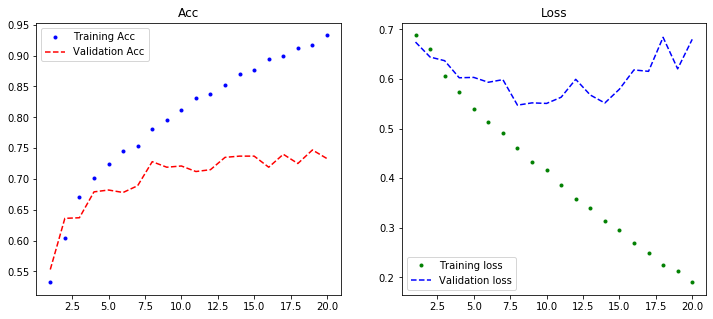

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Acc")
plt.plot(epochs, acc, 'b.', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.legend()

plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.legend()

plt.show()

### Data Augmentation

In [20]:
datagen = ImageDataGenerator(rotation_range=40,        # 影像旋轉角度
                             width_shift_range=0.2,    # 水平平移
                             height_shift_range=0.2,   # 垂直平移
                             shear_range=0.2,          # 傾斜平移  
                             zoom_range=0.2,           # 隨機縮放大小
                             horizontal_flip=True,     # 隨機水平翻轉影像
                             fill_mode='nearest')      # 扭曲的影像要用甚麼方式填補, 有 nearest、reflect、wrap、constant 等四種方式

Choosed Image : C:\Users\azaz4\Desktop\PostgreSQL\data\small_dataset\train\cats\cat.100.jpg

Original size:	(150, 150, 3)
Reshape size:	(1, 150, 150, 3)


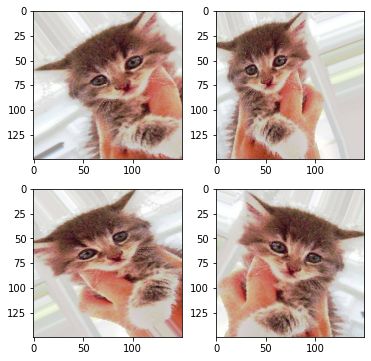

In [21]:
from keras.preprocessing import image

fnames = [ os.path.join(train_cat_dir, fname) for fname in os.listdir(train_cat_dir) ]

img_path = fnames[3]
print(f"Choosed Image : {img_path}\n")

img = image.load_img( img_path, target_size=(150, 150) )
x = image.img_to_array(img)
print(f"Original size:\t{x.shape}")
x = x.reshape( (1,)+x.shape )
print(f"Reshape size:\t{x.shape}")
      
i = 0
plt.figure(figsize=(6,6))
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2,2,i+1)
    imgplot = plt.imshow( image.array_to_img(batch[0]) )
    i+=1
    
    if i%4==0: break
plt.show()

### Using Data Augmentation in Model

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
train_data_gen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_data_gen = ImageDataGenerator(rescale=1/255)

train_generator = train_data_gen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_data_gen.flow_from_directory(val_dir,
                                                         target_size=(150, 150),
                                                         batch_size=32,
                                                         class_mode='binary')

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 39s 391ms/step - loss: 0.6920 - acc: 0.5172 - val_loss: 0.6813 - val_acc: 0.5393
Epoch 2/20
100/100 [==============================] - 35s 347ms/step - loss: 0.6778 - acc: 0.5559 - val_loss: 0.6670 - val_acc: 0.5954
Epoch 3/20
100/100 [==============================] - 35s 355ms/step - loss: 0.6652 - acc: 0.5925 - val_loss: 0.6664 - val_acc: 0.5844
Epoch 4/20
100/100 [==============================] - 35s 351ms/step - loss: 0.6530 - acc: 0.6069 - val_loss: 0.6273 - val_acc: 0.6579
Epoch 5/20
100/100 [==============================] - 38s 383ms/step - loss: 0.6309 - acc: 0.6369 - val_loss: 0.6248 - val_acc: 0.6586
Epoch 6/20
100/100 [==============================] - 53s 530ms/step - loss: 0.6136 - acc: 0.6675 - val_loss: 0.6355 - val_acc: 0.6411
Epoch 7/20
100/100 [==============================] - 38s 375ms/step - loss: 0.5962 - acc: 0.6741 - val_lo

In [24]:
model.save('model/cats_dogs_classificator_small_data_Augmentation.h5')

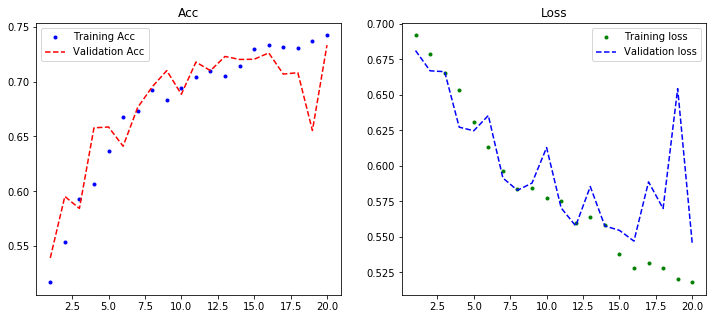

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Acc")
plt.plot(epochs, acc, 'b.', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.legend()

plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.legend()

plt.show()

## **使用 Pretrained model**

通常 pretrained model 都是經過大量資料進行大規模訓練好的 model, 因此我們可以把它想成在 Computer vision 中的通則。

所以當今天我們資料量少時, 我們可以借用這些 pretrained model 的能力, 來幫助我們學習路徑可以更短一點。

最知名的 pretrained model 就非 ImageNet 莫屬，Keras.application 就有很多 pretrained model 拿來做使用。

使用 pretrained model 做訓練還有一些 mega, 這邊以簡單的兩種方法來做說明:
* feature extraction
* fine-tuning 

### Feature Extraction 

簡單來說, 就是將 pretrained model 的分類器給拔掉, Convolutional based 留著, 並接上我們設計的分類器。

這是為什麼呢? 因為 分類器 只適用於 model 它自己所進行的分類, 今天拿去做其他分類可能就不適用了。

而我們留著的 Convolutional based 的部分哪些是要保留, 哪些是要捨棄的呢?

這就取決於你想解決的問題是甚麼了, 通常越上層的 layer 是可以保留的, 

因為它通常都是處理一些高度通用的特徵, 如顏色、形狀、邊緣等，

越底層的 layer 則是越抽象的特徵如貓耳朵、老鼠尾巴這些不太通用的小細節。

#### Convolutional based from VGG16 - Imagenet 

In [26]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [27]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

現在 Convolutional based 有了, 那我們要將它和我們的 分類器 串接在一起，那有兩種方法:
* 沒有 Data Augmentation 版 (運算成本低,因沒有 data augmentation, 但很容易一開始就會有 Overfitting 發生)
* 可以 Data Augmentation 版 (運算成本高, 建議用好點的 GPU 跑, 反正 Colab 免費 \\(=W=)/ ) 

沒有 Data Augmentation 版是分兩步進行
1. 先將我們的 data 用 Convolutional based 來 predicted, 並把這些成果存成 np.array 作為下階段的 input data
2. 將剛剛產生完的 np.array 作為 input, 拿來訓練我們建好的 分類器 model

但我這邊直接使用 Data Augmentation 版的, 也就是直接把 Convolutional based 和 分類器 直接給接起來

In [30]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


**freeze** : 凍結更新原本 pretrained model 的權重, 因為你下面 分類器 的 weight 是 random 的, 在更新權重時很容易把我們 pretrained model 訓練好的權重給破壞掉

In [34]:
print('Before --- Trainable weights : {}'.format(len(model.trainable_weights)))
conv_base.trainable=False
print('After --- Trainable weights : {}'.format(len(model.trainable_weights)))

Before --- Trainable weights : 30
After --- Trainable weights : 4


In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


#### Start to training 

In [36]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_data_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_data_gen = ImageDataGenerator(rescale=1/255)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 46s 462ms/step - loss: 0.6041 - acc: 0.6670 - val_loss: 0.4645 - val_acc: 0.8050
Epoch 2/30
100/100 [==============================] - 48s 476ms/step - loss: 0.4775 - acc: 0.7850 - val_loss: 0.3675 - val_acc: 0.8560
Epoch 3/30
100/100 [==============================] - 45s 451ms/step - loss: 0.4298 - acc: 0.8150 - val_loss: 0.3203 - val_acc: 0.8770
Epoch 4/30
100/100 [==============================] - 45s 454ms/step - loss: 0.4047 - acc: 0.8190 - val_loss: 0.3019 - val_acc: 0.8770
Epoch 5/30
100/100 [==============================] - 46s 461ms/step - loss: 0.3893 - acc: 0.8275 - val_loss: 0.2875 - val_acc: 0.8820
Epoch 6/30
100/100 [==============================] - 46s 459ms/step - loss: 0.3554 - acc: 0.8440 - val_loss: 0.2774 - val_acc: 0.8870
Epoch 7/30
100/100 [==============================] - 46s 462ms/step - loss: 0.3701 - acc: 0.8330 - val_lo

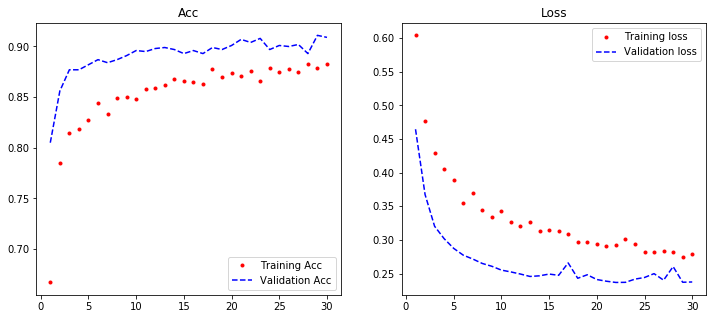

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Acc")
plt.plot(epochs, acc, 'r.', label='Training Acc')
plt.plot(epochs, val_acc, 'b--', label='Validation Acc')
plt.legend()

plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(epochs, loss, 'r.', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.legend()

plt.show()

### Fine tuninig 

所謂的 fine tuning 就是把部分 freeze 的地方給解凍，那實際的流程必須按照以下進行:
1. 把我們自己定義的 model 接在 pretrained model 的後面
2. 凍結 pretrained model 的 Convolutional based
3. 開始訓練我們的 model 
4. 將部分地方給解凍
5. 再共同訓練整個 model

第 3 步之前都是我們做過的, 現在進行 4, 5 步

通常我們解凍都是先從越接近底下的 layer 開始進行, 原因正如我們之前談過它是處理特定特徵的 layer

另外之所以不大量解凍的原因是 解凍太多, 參數就會增多, 那就更容易 over fitting

#### 部分解凍的寫法 

In [37]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

部分解凍後的 training, 記得 training rate 要設小一點, 這是因為要避免我們解凍的這 3 層會太過於影響我們整體的 model

In [ ]:
# 編譯模型
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),  # training rate 我們設小一點
    metrics=['acc'])

# 訓練模型
history = model.fit_generator(   
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

秀出我們的 training evolution, 用指數移動平均值曲線的方式呈現, 因為它的振幅很大

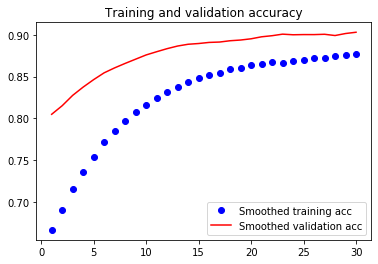

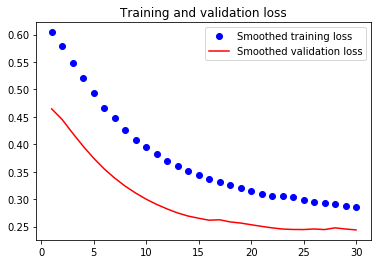

In [42]:
def smooth_curve(points, factor=0.8):
	smoothed_points = []
	for point in points:
		if smoothed_points:
			previous = smoothed_points[-1]
			smoothed_points.append(previous * factor + point * (1 - factor))
		else:
			smoothed_points.append(point)
	return smoothed_points

plt.plot( epochs,
	   smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot( epochs,
	   smooth_curve(val_acc), 'r', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot( epochs,
	   smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot( epochs,
	   smooth_curve(val_loss), 'r', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

用 evaluate_generator 來看準確性

In [45]:
test_generator = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9089999914169311
